In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../..')
from modules.many_features import utils, constants
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

#### Methods to use

In [2]:
def plot_networkx_graph(df, compress=False, compress_val=0,):
    overall_tup_dict = utils.generate_tuple_dict(df)
    sankey_df = pd.DataFrame()
    sankey_df['Label1'] = [i[0] for i in overall_tup_dict.keys()]
    sankey_df['Label2'] = [i[1] for i in overall_tup_dict.keys()]
    sankey_df['value'] = list(overall_tup_dict.values())
    sankey_df['Type'] = 'directed'
    if compress:
        sankey_df = sankey_df[sankey_df.value>compress_val]
    unique_nodes = list(set(list(sankey_df['Label1'].unique()) + list(sankey_df['Label2'].unique())))
#     positions = [(1, i+1) for i in range(len(unique_nodes))]
#     positions_dict = dict(zip(unique_nodes, positions))
    G = nx.from_pandas_edgelist(sankey_df, source='Label1', target='Label2', edge_attr='value')
    nx.draw_networkx(G, arrows=True)#, pos=positions_dict)
    return G

In [4]:
def plot_pyvis_graph(networkx_graph, filename):
    net = Network(notebook=True, cdn_resources='in_line')
    net.from_nx(G)
    net.show(f'{filename}.html')

#### The test df

In [10]:
test_df = pd.read_csv('../../../lupus_trial/test_dfs/orig/dqn_test_df_9500000.csv')
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success
0,0.0,18.0,1.0,1.0,1.0,"['anti_β2gp1_antibodies', 'anti_cardioliphin_a...",0.0,1.0
1,1.0,19.0,1.0,1.0,1.0,"['anti_β2gp1_antibodies', 'anti_cardioliphin_a...",0.0,1.0
2,2.0,16.0,1.0,1.0,1.0,"['anti_β2gp1_antibodies', 'anti_cardioliphin_a...",0.0,1.0
3,3.0,18.0,1.0,1.0,1.0,"['anti_β2gp1_antibodies', 'anti_cardioliphin_a...",0.0,1.0
4,4.0,11.0,1.0,1.0,1.0,"['anti_β2gp1_antibodies', 'anti_cardioliphin_a...",0.0,1.0


In [11]:
# pathways_df = create_sankey_df(test_df)
# pathways_df['Type'] = 'directed'
# # pathways_df['Position'] = [(i,i for i in range(1, len(pathways_df)+1)]
# pathways_df.head()

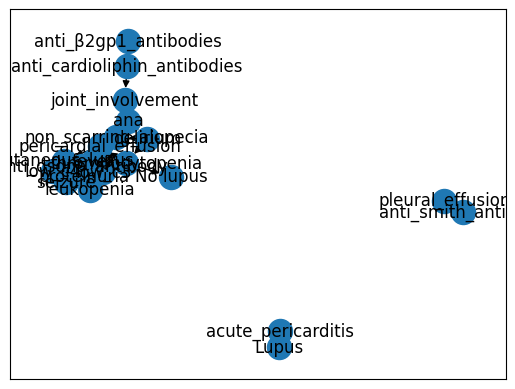

In [12]:
G = plot_networkx_graph(test_df, compress=True, compress_val=1000)
# positions_dict = dict(zip(unique_nodes, positions))
# positions_dict

In [13]:
# G = nx.from_pandas_edgelist(pathways_df, source='Label1', target='Label2', edge_attr='value')
# nx.draw_networkx(G, arrows=True, pos=positions_dict)
# nx.draw_networkx(G, arrows=True)

In [14]:
net = Network('1000px', directed=True, notebook=True, cdn_resources='in_line')
net.from_nx(G)
net.show('example.html')